### Arbitrary Value Imputation

It Consists of replacing NaN by an arbitrary values.
This technique is derived from Kaggle Competetion... 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
%matplotlib inline

In [2]:
df = pd.read_csv("Datasets/titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


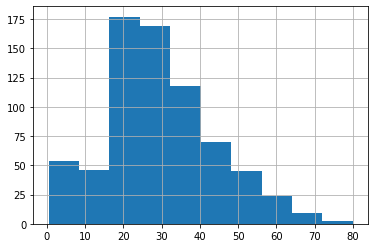

In [3]:
df.Age.hist()

In [4]:
def impute_NaN(df, variable):
    df[variable+"_zero"] = df[variable].fillna(0)
    df[variable+"_hundered"] = df[variable].fillna(100)
    return df

In [5]:
data = impute_NaN(df, 'Age')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_zero,Age_hundered
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,35.0


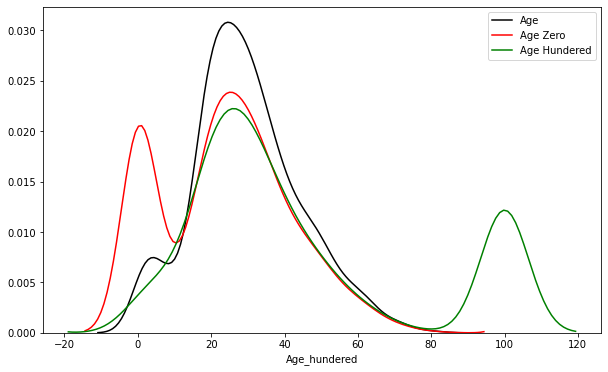

In [6]:
plt.figure(figsize=(10, 6))
sns.distplot(data.Age, label="Age", color='black', hist=False)
sns.distplot(data.Age_zero, label="Age Zero", color='red', hist=False)
sns.distplot(data.Age_hundered, label="Age Hundered", color='green', hist=False)
plt.show()

#### Advantages:

    - Easy to implement
    - Captures the importance of missingess if there is one

##### Disadvantages:

    - Distorts the original distribution of the variable
    - If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
    - Hard to decide which value to use



In [7]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

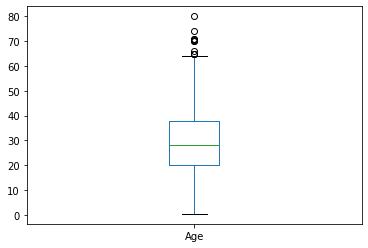

In [8]:
df.Age.plot(kind='box')

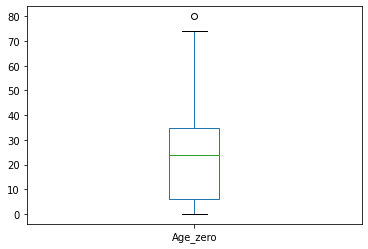

In [9]:
df.Age_zero.plot(kind='box')

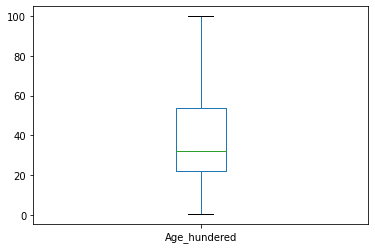

In [10]:
df.Age_hundered.plot(kind='box')

In [11]:
def impute_NaN(data, variable):
    data[variable+"_min"] = data[variable].fillna(data[variable].min())
    data[variable+"_max"] = data[variable].fillna(data[variable].max())
    return df

In [12]:
data = impute_NaN(data = df, variable='Age')
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_zero,Age_hundered,Age_min,Age_max
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0,26.0,26.0


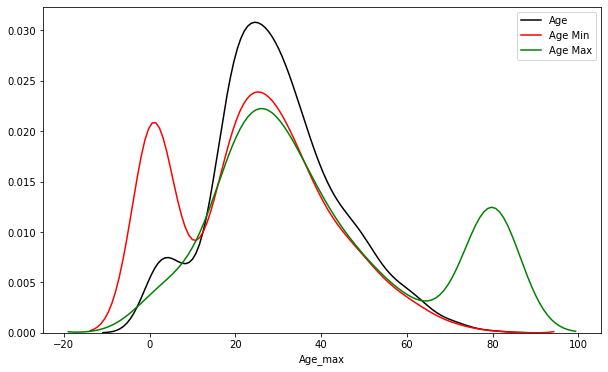

In [13]:
plt.figure(figsize=(10, 6))
sns.distplot(data.Age, label="Age", color='black', hist=False)
sns.distplot(data.Age_min, label="Age Min", color='red', hist=False)
sns.distplot(data.Age_max, label="Age Max", color='green', hist=False)
plt.show()

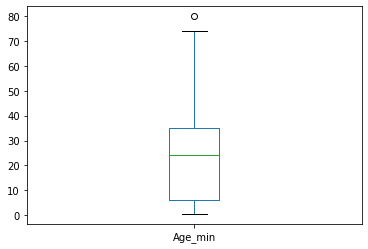

In [14]:
df.Age_min.plot(kind="box")

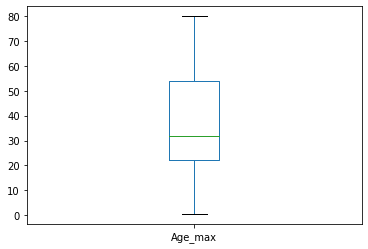

In [15]:
df.Age_max.plot(kind='box')
plt.show()

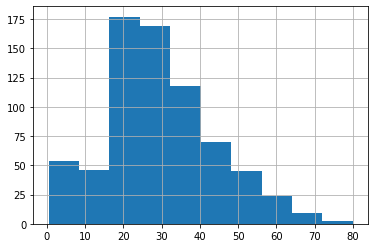

In [16]:
df.Age.hist()

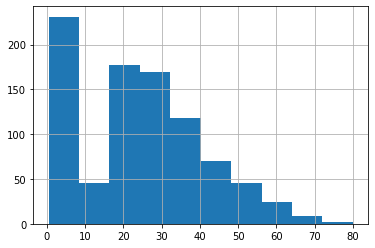

In [17]:
df.Age_min.hist()

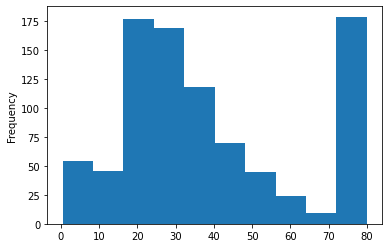

In [18]:
df.Age_max.plot(kind='hist')

## By Replacing NaN values by most Frequent variable

In [19]:
df = pd.read_csv('Datasets/HousePrice.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [20]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

In [21]:
df.isnull().sum().sort_values(ascending=True)

SalePrice        0
BsmtQual        37
GarageType      81
FireplaceQu    690
dtype: int64

In [22]:
df.shape

(1460, 4)

### Computing the Frequency with every feature

In [23]:
df.GarageType.value_counts(normalize=True)

Attchd     0.630892
Detchd     0.280638
BuiltIn    0.063814
Basment    0.013778
CarPort    0.006526
2Types     0.004351
Name: GarageType, dtype: float64

In [24]:
df.FireplaceQu.value_counts(normalize=True)

Gd    0.493506
TA    0.406494
Fa    0.042857
Ex    0.031169
Po    0.025974
Name: FireplaceQu, dtype: float64

In [25]:
df.BsmtQual.value_counts().sort_values(ascending=False)

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

### Grouping

In [26]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False)

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

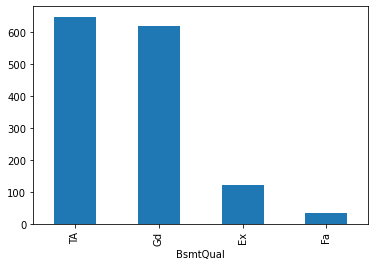

In [27]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot(kind="bar")
plt.show()

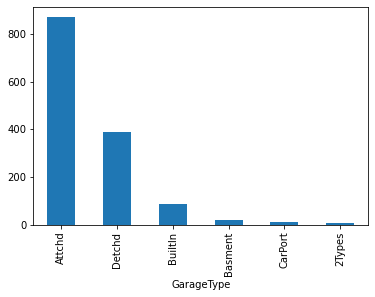

In [28]:
df.groupby(['GarageType'])['GarageType'].count().sort_values(ascending=False).plot(kind="bar")

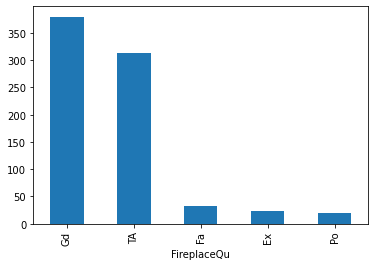

In [29]:
df.groupby(['FireplaceQu'])['FireplaceQu'].count().sort_values(ascending=False).plot(kind="bar")

In [30]:
df.GarageType.mode()[0]

'Attchd'

In [31]:
### Replacing Function
def impute_NaN(data, variable):
    most_frequent = df[variable].value_counts().index[0]
    df[variable+"_most_frequent"] = df[variable]
    df[variable+"_most_frequent"].fillna(most_frequent, inplace=True)
    return data

In [32]:
data = impute_NaN(data=df, variable='GarageType')
data.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,GarageType_most_frequent
0,Gd,NaN,Attchd,208500,Attchd
1,Gd,TA,Attchd,181500,Attchd
2,Gd,TA,Attchd,223500,Attchd
3,TA,Gd,Detchd,140000,Detchd
4,Gd,TA,Attchd,250000,Attchd


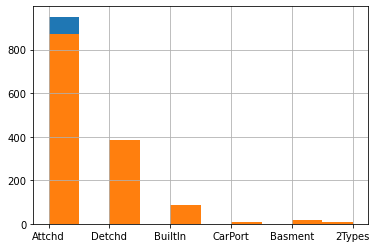

In [33]:
df.GarageType_most_frequent.hist()
df.GarageType.hist()

In [34]:
cols = df.columns
cols

Index(['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice',
       'GarageType_most_frequent'],
      dtype='object')

In [35]:
for col in cols:
    data = impute_NaN(data=df, variable=col)
data.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,GarageType_most_frequent,BsmtQual_most_frequent,FireplaceQu_most_frequent,SalePrice_most_frequent,GarageType_most_frequent_most_frequent
0,Gd,NaN,Attchd,208500,Attchd,Gd,Gd,208500,Attchd
1,Gd,TA,Attchd,181500,Attchd,Gd,TA,181500,Attchd
2,Gd,TA,Attchd,223500,Attchd,Gd,TA,223500,Attchd
3,TA,Gd,Detchd,140000,Detchd,TA,Gd,140000,Detchd
4,Gd,TA,Attchd,250000,Attchd,Gd,TA,250000,Attchd


In [36]:
data.isnull().sum()

BsmtQual                                   37
FireplaceQu                               690
GarageType                                 81
SalePrice                                   0
GarageType_most_frequent                    0
BsmtQual_most_frequent                      0
FireplaceQu_most_frequent                   0
SalePrice_most_frequent                     0
GarageType_most_frequent_most_frequent      0
dtype: int64

In [37]:
def compute_graph(data, col):
    data[col].hist()
    data[col].hist()
    plt.show()

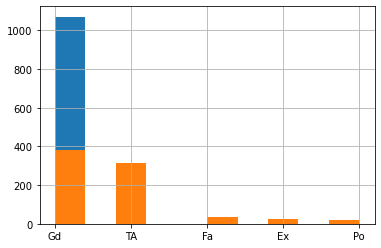

In [38]:
df.FireplaceQu_most_frequent.hist()
df.FireplaceQu.hist()

### Advantages:

    - Easy To implement
    - Fater way to implement 
### Disadvantages:
    - Since we are using the more frequent labels, it may use them in an over respresented way, if there are many nan's
    - It distorts the relation of the most frequent label

## Adding a variable to capture NAN

In [39]:
df = pd.read_csv('Datasets/HousePrice.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [40]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [41]:
df['BsmtQual_temp'] = np.where(df['BsmtQual'].isnull(), 1, 0)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_temp
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


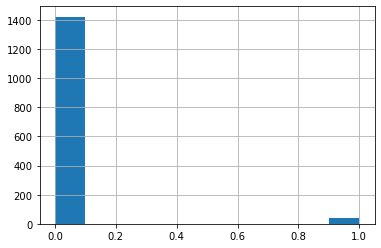

In [42]:
df.BsmtQual_temp.hist()

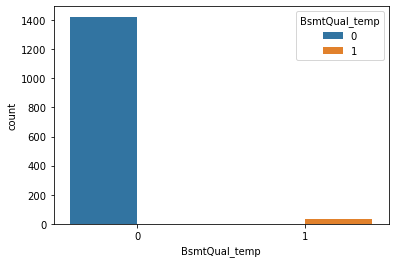

In [43]:
sns.countplot(x=df['BsmtQual_temp'], hue=df["BsmtQual_temp"])
plt.show()

In [44]:
df['BsmtQual_rep'] = df["BsmtQual"]
df['BsmtQual_rep'].fillna(df['BsmtQual'].value_counts().index[0], inplace=True)

In [45]:
df.BsmtQual.isnull().sum(), df.BsmtQual_rep.isnull().sum()

(37, 0)

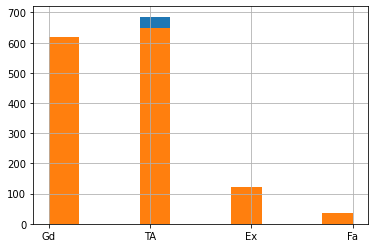

In [46]:
df.BsmtQual_rep.hist()
df.BsmtQual.hist()
plt.show()

In [47]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_temp,BsmtQual_rep
0,Gd,NaN,Attchd,208500,0,Gd
1,Gd,TA,Attchd,181500,0,Gd
2,Gd,TA,Attchd,223500,0,Gd
3,TA,Gd,Detchd,140000,0,TA
4,Gd,TA,Attchd,250000,0,Gd


In [48]:
df['FireplaceQu_temp']=np.where(df["FireplaceQu"].isnull(), 1, 0)
df.head(3)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_temp,BsmtQual_rep,FireplaceQu_temp
0,Gd,NaN,Attchd,208500,0,Gd,1
1,Gd,TA,Attchd,181500,0,Gd,0
2,Gd,TA,Attchd,223500,0,Gd,0


In [49]:
df.FireplaceQu.isnull().sum()

690

In [50]:
df['FireplaceQu_rep'] = df["FireplaceQu"]
df['FireplaceQu_rep'].fillna(df['FireplaceQu'].value_counts().index[0], inplace=True)

In [51]:
df.FireplaceQu.isnull().sum(), df.FireplaceQu_rep.isnull().sum()

(690, 0)

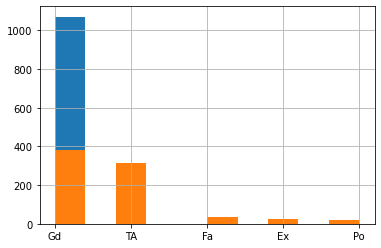

In [52]:
df.FireplaceQu_rep.hist()
df.FireplaceQu.hist()
plt.show()

In [53]:
frequent = df.FireplaceQu.mode()[0]
df.FireplaceQu.fillna(frequent, inplace=True)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_temp,BsmtQual_rep,FireplaceQu_temp,FireplaceQu_rep
0,Gd,Gd,Attchd,208500,0,Gd,1,Gd
1,Gd,TA,Attchd,181500,0,Gd,0,TA
2,Gd,TA,Attchd,223500,0,Gd,0,TA
3,TA,Gd,Detchd,140000,0,TA,0,Gd
4,Gd,TA,Attchd,250000,0,Gd,0,TA


### Suppose if you have more frequent categories, we just replace NAN with a new category¶

In [54]:
df=pd.read_csv('Datasets/HousePrice.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [55]:
def impute_NaN(data, variable):
    data[variable+"_NewVar"]=np.where(data[variable].isnull(), "Missing", data[variable])
    return data

In [56]:
data = impute_NaN(data = df, variable='FireplaceQu')
data.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,FireplaceQu_NewVar
0,Gd,NaN,Attchd,208500,Missing
1,Gd,TA,Attchd,181500,TA
2,Gd,TA,Attchd,223500,TA
3,TA,Gd,Detchd,140000,Gd
4,Gd,TA,Attchd,250000,TA


In [57]:
df.FireplaceQu.isnull().sum()

690

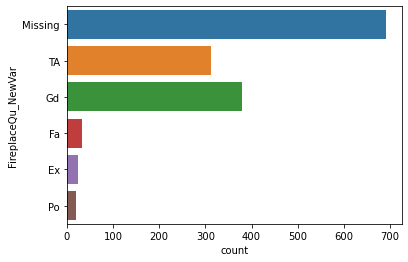

In [58]:
sns.countplot(data=df, y='FireplaceQu_NewVar')
plt.show()

In [59]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    df = impute_NaN(df, feature)
    
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,FireplaceQu_NewVar,BsmtQual_NewVar,GarageType_NewVar
0,Gd,NaN,Attchd,208500,Missing,Gd,Attchd
1,Gd,TA,Attchd,181500,TA,Gd,Attchd
2,Gd,TA,Attchd,223500,TA,Gd,Attchd
3,TA,Gd,Detchd,140000,Gd,TA,Detchd
4,Gd,TA,Attchd,250000,TA,Gd,Attchd


In [60]:
df.isnull().sum()

BsmtQual               37
FireplaceQu           690
GarageType             81
SalePrice               0
FireplaceQu_NewVar      0
BsmtQual_NewVar         0
GarageType_NewVar       0
dtype: int64

In [61]:
df=df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)
df.head()

,SalePrice,FireplaceQu_NewVar,BsmtQual_NewVar,GarageType_NewVar
0,208500,Missing,Gd,Attchd
1,181500,TA,Gd,Attchd
2,223500,TA,Gd,Attchd
3,140000,Gd,TA,Detchd
4,250000,TA,Gd,Attchd


In [ ]:
df.isnull().sum()